## Observations and Insights 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, on='Mouse ID')
merged
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice.
unique_mouse = len(merged['Mouse ID'].unique())
unique_mouse

249

In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dfObj = pd.DataFrame(merged, columns=['Mouse ID', 'Timepoint'])
duplicateRowsDF = dfObj[dfObj.duplicated()]
duplicateRowsDF

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
adfObj = pd.DataFrame(merged, columns=['Mouse ID','Drug Regimen','Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)','Metastatic Sites'])
aduplicateRowsDF = adfObj[adfObj.duplicated()]
aduplicateRowsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [98]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged = merged.drop_duplicates(subset=['Mouse ID','Drug Regimen','Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)','Metastatic Sites'])
clean_merged


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [52]:
# Checking the number of mice in the clean DataFrame.
len(clean_merged['Mouse ID'].unique())


249

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_TV = clean_merged['Tumor Volume (mm3)'].mean()
#mean_TV making sure it works 
median_TV = clean_merged['Tumor Volume (mm3)'].median()
#median_TV always check it works 
var_TV = clean_merged['Tumor Volume (mm3)'].var()
#var_TV
sem_TV =clean_merged['Tumor Volume (mm3)'].sem()
#sem_TV
# This method is the most straighforward, creating multiple series and putting them all together at the end.
Stats_TV = pd.DataFrame({'Mean': [mean_TV], 'Median': [median_TV], 'Variance': [var_TV], 'SEM': [sem_TV]}, index=['Tumor Volume (mm3)'])
Stats_TV


,Mean,Median,Variance,SEM
Tumor Volume (mm3),50.45126,48.954697,79.142206,0.204524


In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
gb_clean_merged = clean_merged.groupby('Drug Regimen')
mean_gb = gb_clean_merged['Tumor Volume (mm3)'].mean()
#mean_gb
med_gb = gb_clean_merged['Tumor Volume (mm3)'].median()
#med_gb
var_gb = gb_clean_merged['Tumor Volume (mm3)'].var()
#var_gb
sem_gb =gb_clean_merged['Tumor Volume (mm3)'].sem()
#sem_gb
# This method produces everything in a single groupby function
Stats_gb = pd.DataFrame({'Mean': mean_gb, 'Median': med_gb, 'Variance': var_gb, 'SEM': sem_gb})
Stats_gb

,Mean,Median,Variance,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.368318,50.909965,42.278090,0.514041
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


## Bar and Pie Charts

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


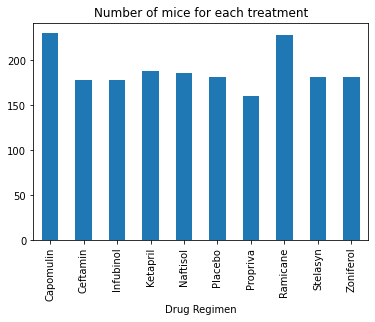

In [115]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Drug_groups = clean_merged.groupby('Drug Regimen')
mouse_count = Drug_groups['Mouse ID'].count()
drug_chart = mouse_count.plot(kind="bar", title="Number of mice for each treatment")
plt.show()

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [35]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
